In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#set up imblearn
!pip install imblearn
#set up catboost
!pip install catboost
#set up lime
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4f737b4f51efc5d3c15c578d7e13fb3faa457dbce2902dc548a7d85344e403dc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


## Import libraries

In [3]:
# Library for data analysis and manipulation
import pandas as pdx
# Essential scientific computing package
import numpy as npx
# Simple visualization and charting
import matplotlib.pyplot as pltx
# Sophisticated statistical displays
import seaborn as snsx
# A library for interactive visualizaton
import plotly.express as px
# Tools for preparing data
from sklearn import preprocessing
# Splitting datasets for ML
from sklearn.model_selection import train_test_split
# Metrics for evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc
# Metrics for evaluating the model
from sklearn.metrics import classification_report
# Calculation of confusion matrix
from sklearn.metrics import confusion_matrix
# Scaling and encoding data
from sklearn.preprocessing import LabelEncoder ,StandardScaler
# Reduction of dimensionality
from sklearn.decomposition import PCA
# Classifier for Extremely Randomized Trees
from sklearn.ensemble import ExtraTreesClassifier
# Support for gradient boosting with categorical features
from catboost import CatBoostClassifier
# Classifier for ensemble voting
from sklearn.ensemble import VotingClassifier
# Optimized gradient boosting library
import xgboost as xgb
# Lightweight gradient boosting framework
import lightgbm as lgb

# To address class imbalance, import RandmOvrSamplr to oversample minorty clases.
from imblearn.over_sampling import RandomOverSampler

# To undersample majority classes, import RandmUndrSamplr.
from imblearn.under_sampling import RandomUnderSampler
# Model explainability using SHAP values
import shap
# Local interpretable model-agnostic explanations
import lime
# LIME for tabular data explanations
import lime.lime_tabular
# Warning control system
import warnings
# Suppress warning messages
warnings.filterwarnings("ignore")

# **load data base**

In [4]:
MentalHealthdt=pdx.read_csv('/content/drive/MyDrive/Mental Health in Tech Survey (Responses) - Form Responses 1.csv')

# **Show Top five row of the dataset**

In [5]:
MentalHealthdt.head()

Timestamp  Age  Gender         Country  \
0  8/27/2014 11:29:31   37  Female   United States   
1  8/27/2014 11:29:37   44       M   United States   
2  8/27/2014 11:29:44   32    Male          Canada   
3  8/27/2014 11:29:46   31    Male  United Kingdom   
4  8/27/2014 11:30:22   31    Male   United States   

  If you live in the United States, which state or territory do you live in?  \
0                                                 IL                           
1                                                 IN                           
2                                                NaN                           
3                                                NaN                           
4                                                 TX                           

  Are you self-employed? Do you have a family history of mental illness?  \
0                    NaN                                              No   
1                    NaN                                              No   
2                    NaN                                              No   
3                    NaN                                             Yes   
4                    NaN                                              No   

  Have you sought treatment for a mental health condition?  \
0                                                Yes         
1                                                 No         
2                                                 No         
3                                                Yes         
4                                                 No         

  If you have a mental health condition, do you feel that it interferes with your work?  \
0                                              Often                                      
1                                             Rarely                                      
2                                             Rarely                                      
3                                              Often                                      
4                                              Never                                      

  How many employees does your company or organization have?  ...  \
0                                               6-25          ...   
1                                     More than 1000          ...   
2                                               6-25          ...   
3                                             26-100          ...   
4                                            100-500          ...   

  How easy is it for you to take medical leave for a mental health condition?  \
0                                      Somewhat easy                            
1                                         Don't know                            
2                                 Somewhat difficult                            
3                                 Somewhat difficult                            
4                                         Don't know                            

  Do you think that discussing a mental health issue with your employer would have negative consequences?  \
0                                                 No                                                        
1                                              Maybe                                                        
2                                                 No                                                        
3                                                Yes                                                        
4                                                 No                                                        

  Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                 No                                                          
1                                                 

# **change column name of the Dataset**

In [6]:
# Uses a predetermined dictionary mapping to rename DataFrame columns from verbose survey questions to succinct labels.
new_column_names = {
    'If you live in the United States, which state or territory do you live in?': 'state',
    'Are you self-employed?': 'self_employed',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you sought treatment for a mental health condition?': 'treatment',
    'If you have a mental health condition, do you feel that it interferes with your work?': 'work_interferes',
    'How many employees does your company or organization have?': 'no_employees',
    'Do you work remotely (outside of an office) at least 50% of the time?': 'remote_work',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Does your employer provide mental health benefits?': 'benefits',
    'Do you know the options for mental health care your employer provides?': 'care_options',
    'Has your employer ever discussed mental health as part of an employee wellness program?': 'wellness_program',
    'Does your employer provide resources to learn more about mental health issues and how to seek help?': 'seek_help',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?': 'anonymity',
    'How easy is it for you to take medical leave for a mental health condition?': 'leave',
    'Do you think that discussing a mental health issue with your employer would have negative consequences?': 'mental_health_consequence',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'phys_health_consequence',
    'Would you be willing to discuss a mental health issue with your coworkers?': 'coworkers',
    'Would you be willing to discuss a mental health issue with your direct supervisor(s)?': 'supervisor',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'mental_health_interview',
    'Would you bring up a physical health issue with a potential employer in an interview?': 'phys_health_interview',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'mental_vs_physical',
    'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?': 'obs_consequence',
    'Any additional notes or comments': 'comments'
}
MentalHealthdt.rename(columns=new_column_names, inplace=True)

# **Exploratory Data Analyse**

In [7]:
MentalHealthdt.head()

Timestamp  Age  Gender         Country state self_employed  \
0  8/27/2014 11:29:31   37  Female   United States    IL           NaN   
1  8/27/2014 11:29:37   44       M   United States    IN           NaN   
2  8/27/2014 11:29:44   32    Male          Canada   NaN           NaN   
3  8/27/2014 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  8/27/2014 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interferes    no_employees  ...  \
0             No       Yes           Often            6-25  ...   
1             No        No          Rarely  More than 1000  ...   
2             No        No          Rarely            6-25  ...   
3            Yes       Yes           Often          26-100  ...   
4             No        No           Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

# **Information of the dataset**

In [8]:
MentalHealthdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1260 non-null   object
 1   Age                        1260 non-null   int64 
 2   Gender                     1260 non-null   object
 3   Country                    1260 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1242 non-null   object
 6   family_history             1260 non-null   object
 7   treatment                  1260 non-null   object
 8   work_interferes            996 non-null    object
 9   no_employees               1260 non-null   object
 10  remote_work                1260 non-null   object
 11  tech_company               1260 non-null   object
 12  benefits                   1260 non-null   object
 13  care_options               1260 non-null   object
 14  wellness

# **Data description**

In [9]:
MentalHealthdt.describe()

Age
count  1.260000e+03
mean   7.936511e+07
std    2.817181e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

# **Shape of dataset**

In [10]:
MentalHealthdt.shape

(1260, 27)

# **Check Null value**

In [11]:
MentalHealthdt.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         516
self_employed                  18
family_history                  0
treatment                       0
work_interferes               264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1096
dtype: int64

Drop irrelevant Column

In [12]:
MentalHealthdt = MentalHealthdt.drop(['Timestamp', 'comments'], axis=1)

# **show all column Name**

In [13]:
MentalHealthdt.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interferes', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

# **Define a target varible**

In [14]:
x = MentalHealthdt.drop('obs_consequence', axis=1)
y = MentalHealthdt['obs_consequence']

# **Applied Pre processing**

## Fill the missing values of catogorical columns by mode

In [15]:
# List of categorical features that need missing value treatment
categorical_features=[ 'state', 'self_employed','work_interferes']
# Iterate through each categorical feature in the list
for feature in categorical_features:
# Verify whether the feature is present in the DataFrame columns.
  if feature in MentalHealthdt.columns:
# Use that feature's mode to fill in the missing values.
    MentalHealthdt[feature].fillna(MentalHealthdt[feature].mode()[0], inplace=True)

# checking null values after the handle null values

In [16]:
# Checks for missing values (NaN) in each column of the MentalHealthdt DataFrame
MentalHealthdt.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interferes              0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# **Applying mapping on gender column**

In [17]:
# To fill in  mising valus
def change_gender(y):
  if y in ['Male', 'M', 'male', 'm', 'maile', 'Mal', 'Mail', 'Man']:
    return 'M'
  elif y in ['Female', 'female', 'f', 'F', 'femail']:
    return 'F'
  else:
    return 'Other'

In [18]:
# Modifies the 'Gender' column in the DataFrame 'MentalHealthdt' by applying a transformation function
MentalHealthdt['Gender'] = MentalHealthdt['Gender'].apply(change_gender)

In [19]:
# Accesses the 'Gender' column from the MentalHealthdt DataFrame
MentalHealthdt['Gender']

0       F
1       M
2       M
3       M
4       M
       ..
1255    M
1256    M
1257    F
1258    M
1259    M
Name: Gender, Length: 1260, dtype: object

# **perform EDA**

# **Data Visuliazation**

# **pie Graph of Gender**

In [20]:
# Creates a pie chart visualization using Plotly Express (px)
fig = px.pie(MentalHealthdt, names='Gender', title='Distribution of Genders')
# Displays the generated pie chart figure
fig.show()

##Barplot of treatment and obs_consequence

In [21]:
# Create a cross-tabulation of treatment status vs observed consequences
treatment_counts = MentalHealthdt.groupby('treatment')['obs_consequence'].value_counts().unstack()
# Initialize a Plotly Express bar chart figure
fig = px.bar(treatment_counts,
             barmode='group',
             # Uses Plotly's preset 'Pastel' qualitative color palette to set the plot's color scheme.
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title="Distribution of 'obs_consequence' across different 'treatment' groups",
             labels={"value": "Count", "index": "treatment", "variable": "Observed Consequence"})
# Display the interactive visualization
fig.show()


# **KDE plot of Age**

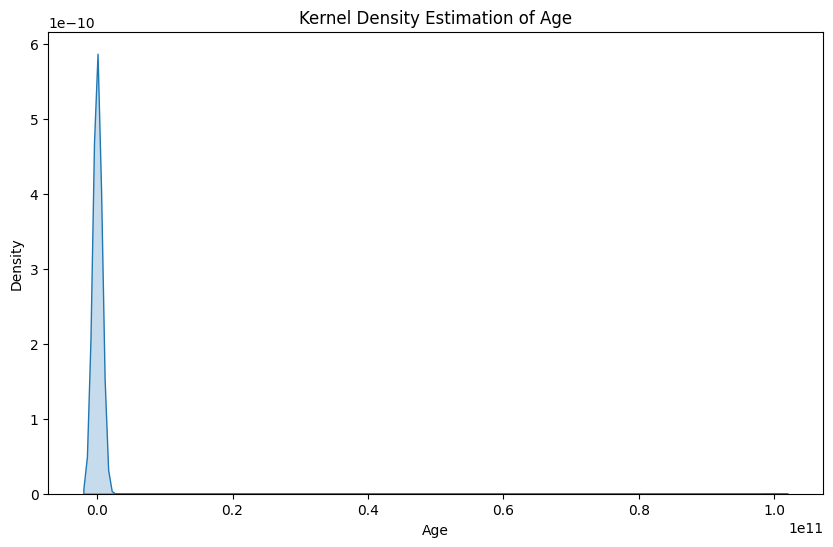

In [22]:
# Make a new figure using the given measurements.
pltx.figure(figsize=(10, 6))
# Create a Kernel Density Estimation (KDE) plot for the 'Age' column in MentalHealthdt DataFrame
snsx.kdeplot(MentalHealthdt['Age'], shade=True)
# Establish the plot's title.
pltx.title('Kernel Density Estimation of Age')
# Give the xaxis a labl.
pltx.xlabel('Age')
# Give the yaxis a labl.
pltx.ylabel('Density')
# Present the plot
pltx.show()

# Histogram of Gender

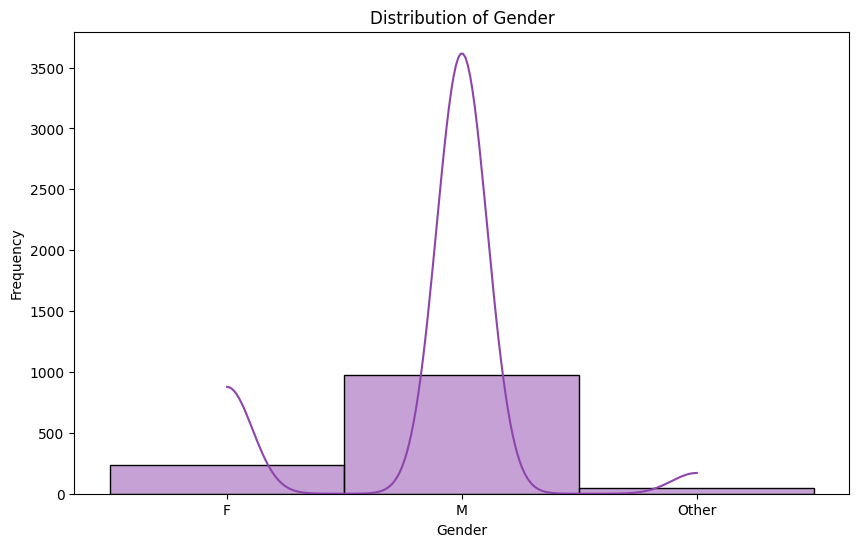

In [23]:
# Make a new figure using the given measurements.
pltx.figure(figsize=(10, 6))

# Create a histogram
snsx.histplot(MentalHealthdt['Gender'], kde=True, color="#8e44ad")

# Add a tittle to  plott with larger font
pltx.title('Distribution of Gender')

# Give the horizontal axis, or x-axis, a label.
pltx.xlabel('Gender')

# Label the vertical axis, or y-axis.
pltx.ylabel('Frequency')

# Show the plot in its complete configuration.
pltx.show()

# Bar plot of no_employees

In [24]:
# Creates a bar plot figure using Plotly Express (aliased as px)
fig = px.bar(
    # Specifies the DataFrame containing the data (MentalHealthdt)
    MentalHealthdt,
    # Sets the x-axis variable to 'no_employees' column
    x='no_employees',
    # Colors the bars based on the 'no_employees' categories
    color='no_employees',
    # Defines custom colors for each category value
    color_discrete_map={
        'value1': '#7FD4C1',  # Teal-green color for first category
        'value2': '#30BFDD',  # Blue color for second category
        'value3': '#8690FF',  # Purple-blue color for third category
    }
)
# Displays the interactive plot (works in Jupyter notebooks/web environments)
fig.show()

# **Label encoding of catogorical columns**

In [25]:
# List of names for category columns that require encoding
categorical_features = ['Gender', 'state', 'self_employed', 'family_history', 'Country', 'treatment', 'work_interferes', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical']

# Initialize a LabelEncoder object to convert categorical text data to numerical values
le = LabelEncoder()

# Special handling for 'Gender' colmn
if 'Gender' in x.columns:
    # Fit and transform the 'Gendr' colmn specifically
    x['Gender'] = le.fit_transform(x['Gender'])

# Loop through all other categorical featurs
for feature in categorical_features:
    # Check if featur exists in DataFrame colmns and it's not 'Gender'
    if feature in x.columns and feature != 'Gender':
        # Fit and transform each categorical feature to numerical values
        x[feature] = le.fit_transform(x[feature])

# **Heat map**

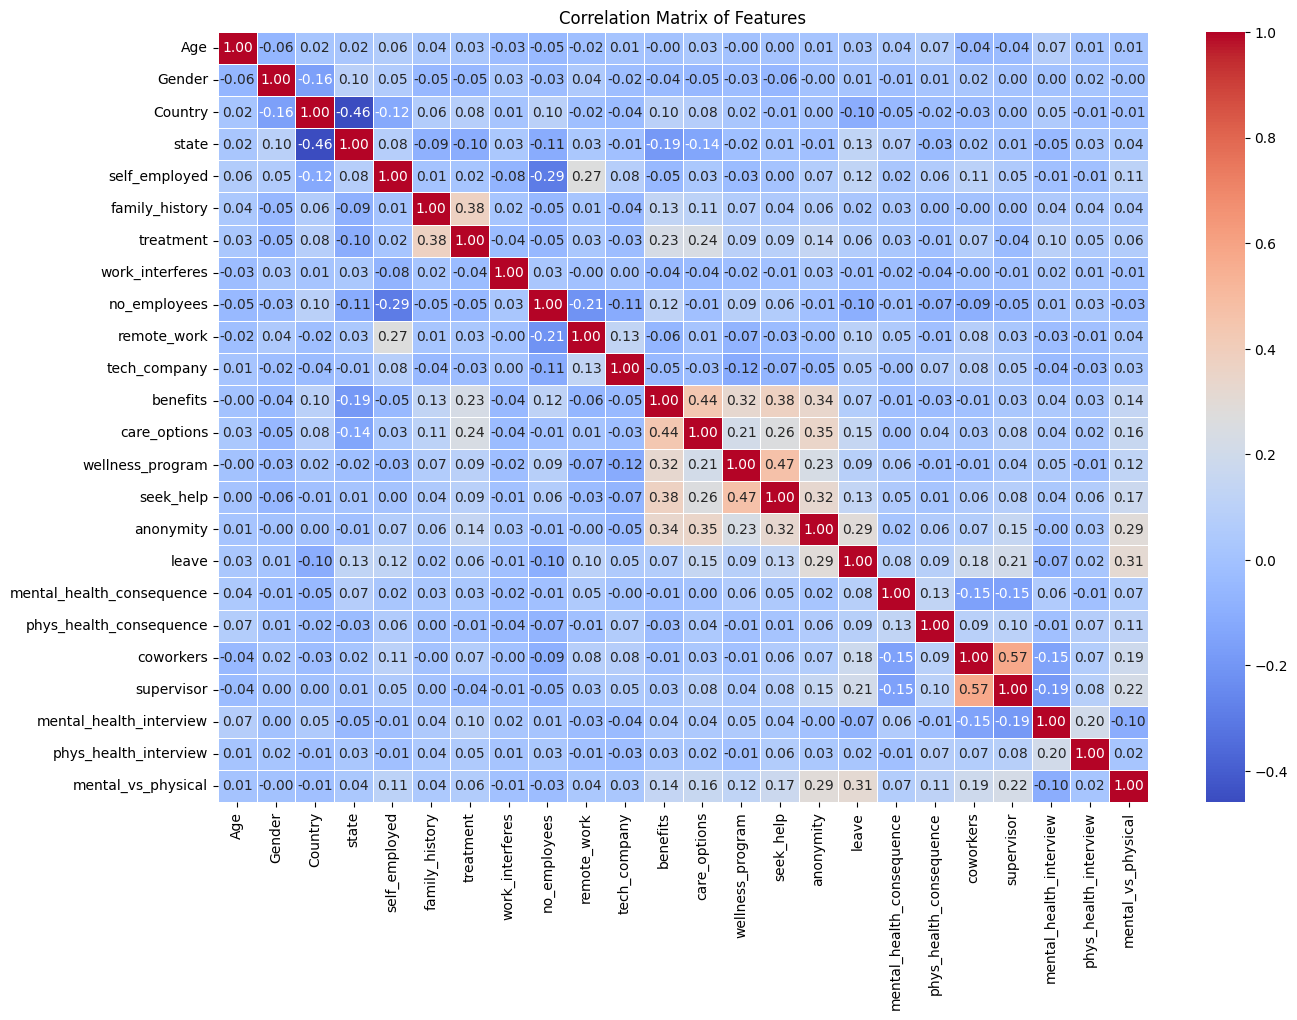

In [56]:
# Select only numericl columns from DataFrame x by checking their data types
numerical_features = x.select_dtypes(include=['number']).columns

# Crate a new DataFrame contining only numerical featur
x_numerical = x[numerical_features]

# Generate an entirely new Matplotlib figure of the desired size.
pltx.figure(figsize=(15, 10))

# Make a correlation matrix heatmap visualization:
snsx.heatmap(x_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)

# Give the plot a title.
pltx.title('Correlation Matrix of Features')

# Display the generated heatmap plot
pltx.show()

#Check Balancing Data

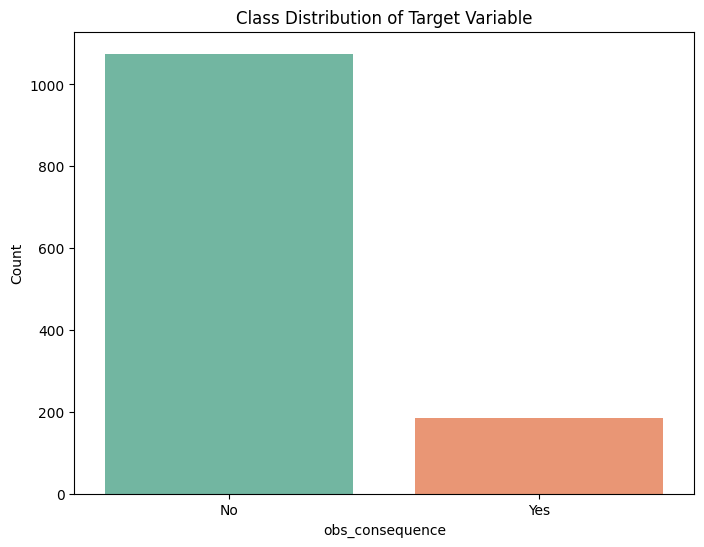

In [27]:
# Generates a new matplotlib figure with the given measurements.
pltx.figure(figsize=(8, 6))

# Creates a countplot (bar plot of value counts) using seaborn
snsx.countplot(x=y, palette="Set2")

# At the top of the plot, add a title.
pltx.title('Class Distribution of Target Variable')

# Labels the x-axis with name of our target variable
pltx.xlabel('obs_consequence')

# Labels the y-axis to indicate we're showing counts
pltx.ylabel('Count')

# Displays the final plot (needed in non-interactive environments)
pltx.show()

# **Balance Data**

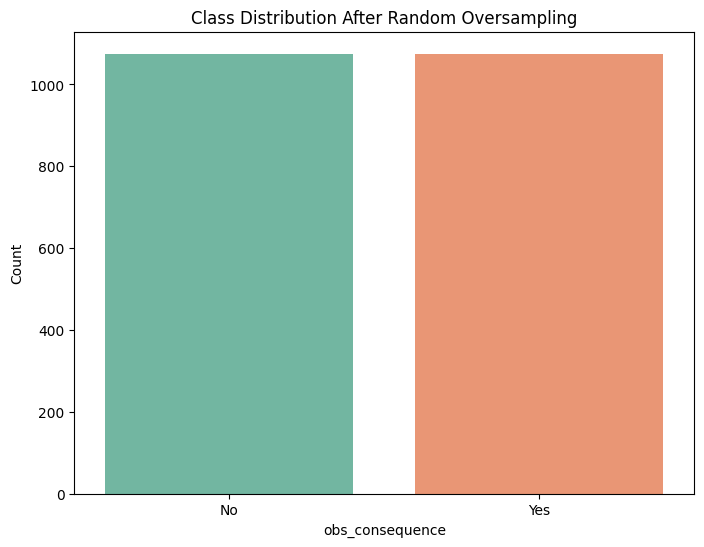

In [28]:
# To ensure repeatability, initialize RandmOvrSamplr
oversampler = RandomOverSampler(random_state=42)

# Use ovrsamplling to ensure that dataset is balanced.
x_resampled, yresampld = oversampler.fit_resample(x, y)

# Creaate a fig with dimensons
pltx.figure(figsize=(8, 6))

# Creaate a counttplott of resampled targt variable using seaborn
snsx.countplot(x=yresampld, palette="Set2")

# Add title to the plot
pltx.title('Class Distribution After Random Oversampling')

# Label the x-axis with the target variable name
pltx.xlabel('obs_consequence')

# Give the y-axis a label.
pltx.ylabel('Count')

# Present the plot
pltx.show()

# **Apply PCA For Feature Selection**

In [29]:
# Set up 20 principle components for principle Component Analysis.
pca = PCA(n_components=20)
# Transsform the resampled data's using PCA.
xpca = pca.fit_transform(x_resampled)
# Verify the data's shape after transformation.
xpca.shape

(2150, 20)

# **split the data**

In [30]:
# Divides the target variable and feature matrix into training and test sets.
xtrainmentalhealth,xtestmentalhealth, ytrainmentalhealth, ytestmentalhealth = train_test_split(xpca, yresampld, test_size=0.3, random_state=42)


# applied standerdscaler on training and testing data

In [31]:
# Set up a StandardScaler object to scale and normalize features.
scaler = StandardScaler()
# Align training data with  scaler
xtrainmentalhealth = scaler.fit_transform(xtrainmentalhealth)
# Test dataa should undergo similar scaling change.
xtestmentalhealth = scaler.transform(xtestmentalhealth)

# **Model 1 Extra Tree Model**

In [32]:
# Set up a model for the ET Clasifier with particular hyperparameters.
extratreesmodel = ExtraTreesClassifier(n_estimators=500, random_state=42,criterion='entropy',min_samples_split=10)
# Use the traaining dataa to traain the ET model.
extratreesmodel.fit(xtrainmentalhealth, ytrainmentalhealth)
# Predict using the training model on the test set..
ypredextratrees = extratreesmodel.predict(xtestmentalhealth)

# **Traning Result of Extra Tree modl 1**

In [33]:
# Determine the ET classifier model's training accuracy score.
training_accuracyextratrees = extratreesmodel.score(xtrainmentalhealth, ytrainmentalhealth)
# Use a prepared string to print traaining accuracy.
print(f"ExtraTrees Classifier Training Accuracy: {training_accuracyextratrees}")

# Use traaining sett to generate predictions from  ET model.
ytrainmentalhealth_pred_extra_trees = extratreesmodel.predict(xtrainmentalhealth)

# Printt a thorough training performance clasification repport.
print(classification_report(ytrainmentalhealth, ytrainmentalhealth_pred_extra_trees))

ExtraTrees Classifier Training Accuracy: 0.9980066445182725
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       761
         Yes       1.00      1.00      1.00       744

    accuracy                           1.00      1505
   macro avg       1.00      1.00      1.00      1505
weighted avg       1.00      1.00      1.00      1505



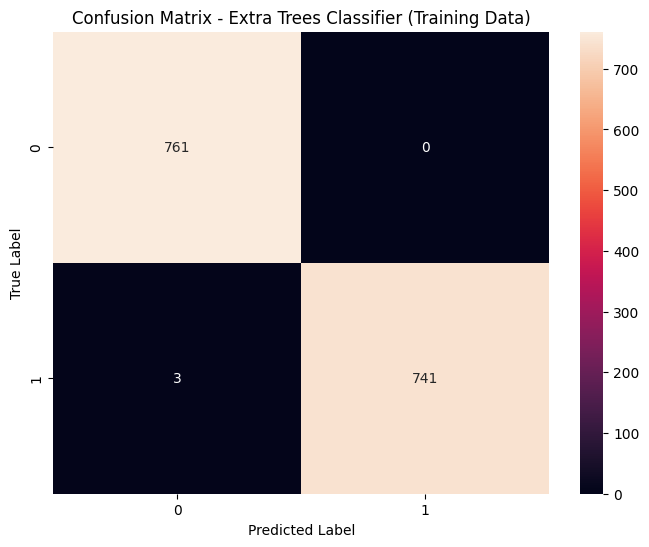

In [34]:
# Create a confussion matrx using training data for the ET Clasifier.
cm_extra_trees = confusion_matrix(ytrainmentalhealth, ytrainmentalhealth_pred_extra_trees)
# Make a fig for the plot
pltx.figure(figsize=(8, 6))
# Confussion matrx heatmap plot with annotated values
snsx.heatmap(cm_extra_trees, annot=True, fmt="d")
# Give the confuson matrx plot a tittle.
pltx.title("Confusion Matrix - Extra Trees Classifier (Training Data)")
# Label x axis as predictted class values
pltx.xlabel("Predicted Label")
# Label y axis as true class values
pltx.ylabel("True Label")
# generated plott
pltx.show()

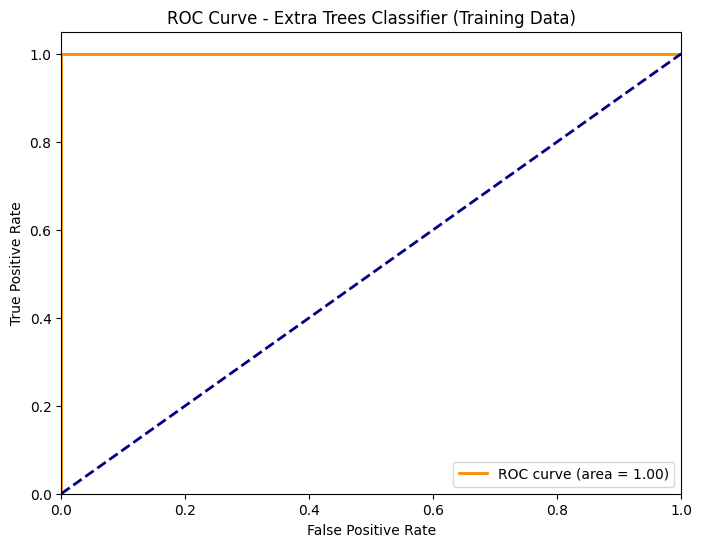

In [35]:
# The ET model should be used to get the anticipated probability for the positive classes.
y_prob_extra_trees = extratreesmodel.predict_proba(xtrainmentalhealth)[:, 1]

# Use explicit positive class labeling to determine the ROC curve's measurements.
fpr_extra_trees, tpr_extra_trees, thresholds_extra_trees = roc_curve(ytrainmentalhealth, y_prob_extra_trees, pos_label='Yes')

# Find the AUC, or area under the ROC, score.
roc_auc_extra_trees = auc(fpr_extra_trees, tpr_extra_trees)

# Make a ROC plot figure of the designated size.
pltx.figure(figsize=(8, 6))

# Plott the real ROC crv with AUC value labeled and the orange line.
pltx.plot(fpr_extra_trees, tpr_extra_trees, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_extra_trees:.2f})')

# Draw a diagonaal dasheed line to symbolize  randdom guess.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Establish  False Positive Rate x axis boundarries.
pltx.xlim([0.0, 1.0])

# Set Truee Positivee Rate y axis limitations with  little buffer.
pltx.ylim([0.0, 1.05])

# Indicate the Falsse Posittive on  x axis.
pltx.xlabel('False Positive Rate')

# Indicate the Trrue Posittive  on y axis.
pltx.ylabel('True Positive Rate')

# Indicate the modl and data type in  plot title.
pltx.title('ROC Curve - Extra Trees Classifier (Training Data)')

# The legend should be placed in the lower right corner.
pltx.legend(loc='lower right')

# demonstrate the developed plot.
pltx.show()

# **Testing Result of Extra Tree model model**

Extra Trees Classifier Accuracy: 0.9658914728682171
              precision    recall  f1-score   support

          No       0.95      0.99      0.97       314
         Yes       0.99      0.95      0.97       331

    accuracy                           0.97       645
   macro avg       0.97      0.97      0.97       645
weighted avg       0.97      0.97      0.97       645



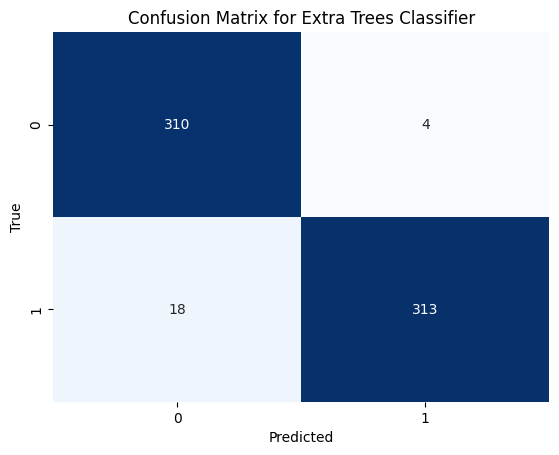

In [36]:
# Determine the accuracy score by commparing Extra Trees modl predicttions with the test labls .
accuracyextratrees = accuracy_score(ytestmentalhealth, ypredextratrees)
# Printt the Extra Trees Clasifier's formatted acuracy score.
print(f"Extra Trees Classifier Accuracy: {accuracyextratrees}")
# Create and print a thorough categorization report.
print(classification_report(ytestmentalhealth, ypredextratrees))
# To find out how well the model is working, compute the confussion matrx.
cm_extra_trees = confusion_matrix(ytestmentalhealth, ypredextratrees)
# Plot a confuson matrx heatmap without a colorbar, using comments and a blue colormap.
snsx.heatmap(cm_extra_trees, annot=True, fmt='d', cmap="Blues", cbar=False)
# Configure the confussion matrx plot title.
pltx.title('Confusion Matrix for Extra Trees Classifier')
# Indicate 'Predicted' values on the x-axis.
pltx.xlabel('Predicted')
# Indicate 'True' values on the y-axis.
pltx.ylabel('True')
# Display the confusion matrix visualization
pltx.show()

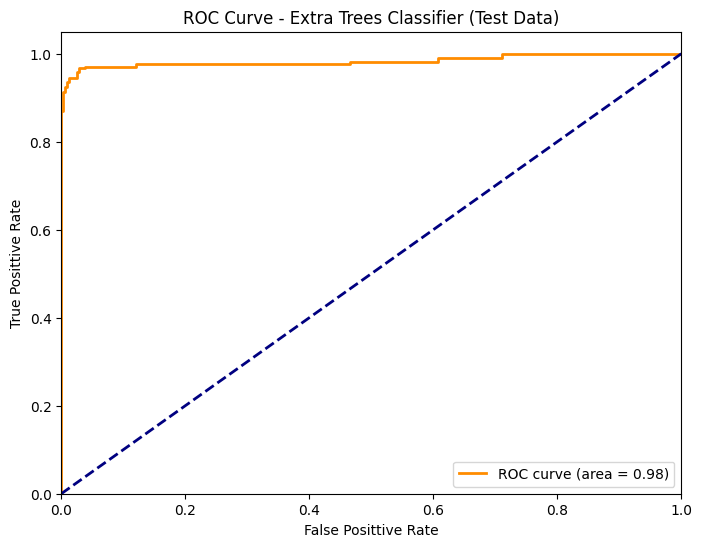

In [37]:
# Use the Extra Trees model to provide estimated probability for the positive clas ('Yes').
yprobextratreestest = extratreesmodel.predict_proba(xtestmentalhealth)[:, 1]

# Utilizing test data and the positive label "Yes," compute ROC curve metrics (FPR, TPR, and thresholds)
fpr_extra_trees_test, tpr_extra_trees_test, thresholds_extra_trees_test = roc_curve(ytestmentalhealth, yprobextratreestest, pos_label='Yes')

# Determine the AUC score, or area under the ROC curve.
roc_auc_extra_trees_test = auc(fpr_extra_trees_test, tpr_extra_trees_test)

# Construct a figure of the desired size.
pltx.figure(figsize=(8, 6))

# Plott ROC crv in  legend using  orange line, linewidth 2, and AUC score.
pltx.plot(fpr_extra_trees_test, tpr_extra_trees_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_extra_trees_test:.2f})')

# Plott the random classifier as a diagonal dashed line.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Establish the x axis bounds.
pltx.xlim([0.0, 1.0])

# Define the y axis limits
pltx.ylim([0.0, 1.05])

# Put 'False Positive Rate' on  x axis label.
pltx.xlabel('False Posittive Rate')

# Put 'True Positive Rate' on  y axis label.
pltx.ylabel('True Posittive Rate')

# Include the model name in narrative title.
pltx.title('ROC Curve - Extra Trees Classifier (Test Data)')

# Put the leggend in bottom rightt cornner.
pltx.legend(loc='lower right')

# Present the storyline
pltx.show()


# **Modl 2 cat boost Model**

In [38]:
# Set up the CB clasifier .
catboostmodelcls = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', random_seed=42, verbose=10)

# The CB model is trained using training data.
catboostmodelcls.fit(xtrainmentalhealth, ytrainmentalhealth)

# Make predictions on test data using the learned CB modl. .
y_pred_catboost = catboostmodelcls.predict(xtestmentalhealth)

0:	learn: 0.6701547	total: 77ms	remaining: 7.62s
10:	learn: 0.4706263	total: 227ms	remaining: 1.83s
20:	learn: 0.3908797	total: 370ms	remaining: 1.39s
30:	learn: 0.3284609	total: 469ms	remaining: 1.04s
40:	learn: 0.2826325	total: 578ms	remaining: 832ms
50:	learn: 0.2419936	total: 766ms	remaining: 736ms
60:	learn: 0.2106569	total: 885ms	remaining: 566ms
70:	learn: 0.1852668	total: 1.05s	remaining: 430ms
80:	learn: 0.1572225	total: 1.24s	remaining: 291ms
90:	learn: 0.1403239	total: 1.34s	remaining: 133ms
99:	learn: 0.1216124	total: 1.49s	remaining: 0us


# **Training Result**

In [39]:
# Determine and save the CatBoost model's training accuracy score.
training_accuracy_catboost = catboostmodelcls.score(xtrainmentalhealth, ytrainmentalhealth)

# Use a prepared string to print the training accuracy.
print(f"CatBoost Classifier Training Accuracy: {training_accuracy_catboost}")

# Use the CatBoost model to produce predicttions on trainning data.
ytrainmentalhealth_pred_catboost = catboostmodelcls.predict(xtrainmentalhealth)

# Print a clasification reporrt that displays .
print(classification_report(ytrainmentalhealth, ytrainmentalhealth_pred_catboost))

CatBoost Classifier Training Accuracy: 0.9966777408637874
              precision    recall  f1-score   support

          No       0.99      1.00      1.00       761
         Yes       1.00      0.99      1.00       744

    accuracy                           1.00      1505
   macro avg       1.00      1.00      1.00      1505
weighted avg       1.00      1.00      1.00      1505



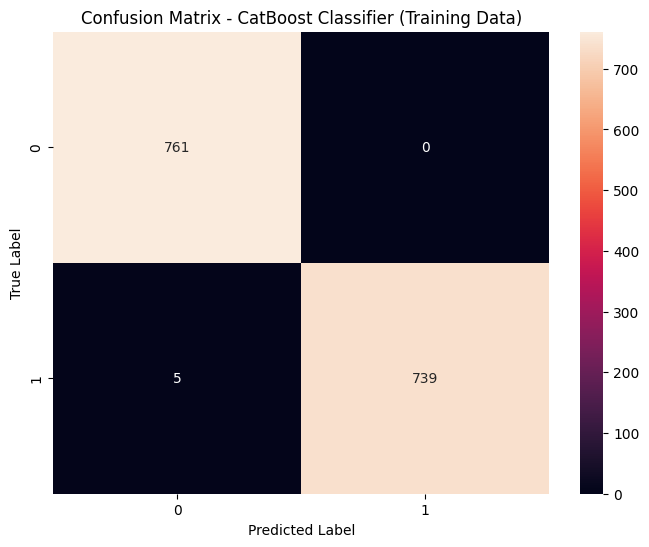

In [40]:
 # Generate confussion matrx for CB trainning predictions
cm_catboost_train = confusion_matrix(ytrainmentalhealth, ytrainmentalhealth_pred_catboost)
pltx.figure(figsize=(8, 6))  # Make a figure for the plot that is 8 by 6 inches.
snsx.heatmap(cm_catboost_train, annot=True, fmt="d") # Use integer formatting to plot an annotated confusion matrix heatmap.
pltx.title("Confusion Matrix - CatBoost Classifier (Training Data)")  # Set plot title
pltx.xlabel("Predicted Label")  # Labl x axis as predictted values
pltx.ylabel("True Label")  # Labl y axis as acttual values
pltx.show() # Presentt the storyline.

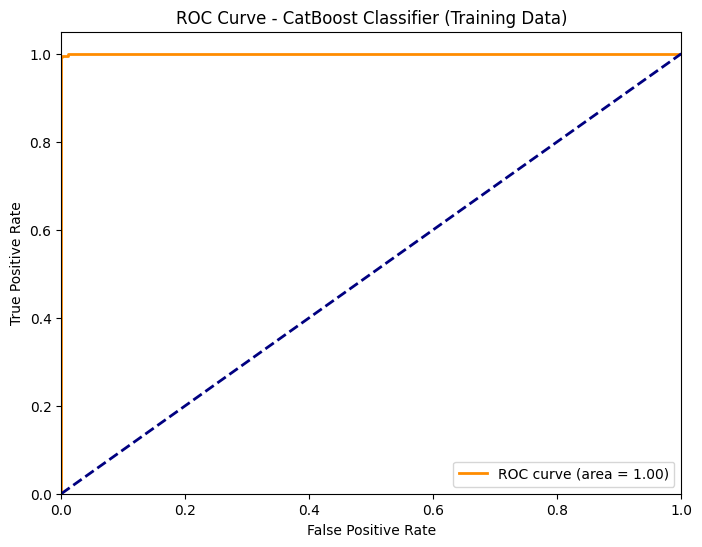

In [41]:
# Using trainning data, create predictted values for the posittive clas  using the CB modl.
y_prob_catboost_train = catboostmodelcls.predict_proba(xtrainmentalhealth)[:, 1]

# Determine training data's ROC crv metrics.
fpr_catboost_train, tpr_catboost_train, thresholds_catboost_train = roc_curve(ytrainmentalhealth, y_prob_catboost_train, pos_label='Yes')

# Determine the training data performance evaluation's area undder  ROC crv (AUC).
roc_auc_catboost_train = auc(fpr_catboost_train, tpr_catboost_train)

# Create a new fig for the ROC crv plott with the given measurements .
pltx.figure(figsize=(8, 6))

# Use the orange line to plot the ROC crv with linewidth equal to 2, and show the AUC score in the legend.
pltx.plot(fpr_catboost_train, tpr_catboost_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_catboost_train:.2f})')

# For reference, plot the diagonal random-guessing line (dashed navy line).
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set  False Posittive Rate x axis boundarries
pltx.xlim([0.0, 1.0])

# For the True Posittive Rate, set the y axis boundarries .
pltx.ylim([0.0, 1.05])

#'False Positive Rate' should be placed on the x axis.
pltx.xlabel('False Positive Rate')

#On the y-axis, write 'True Positive Rate'.
pltx.ylabel('True Positive Rate')

# Indicate  model and data type (training) in the plot title.
pltx.title('ROC Curve - CatBoost Classifier (Training Data)')

# Place the legend in the plot's
pltx.legend(loc='lower right')

# View the ROC crv plott in its complete configuration.
pltx.show()

# **Testing Result**

In [42]:
# Determines the accuracy score by contrasting the predictions of the CatBoost modl withtest labls.
accuracy_catboost = accuracy_score(ytestmentalhealth, y_pred_catboost)

# Outputs the acuracy score of  CatBoost modl in a readable formatted string.
print(f"CatBoost Classifier Accuracy: {accuracy_catboost}")

# Produces and publishes a thorough categorization report.
print(classification_report(ytestmentalhealth, y_pred_catboost))

CatBoost Classifier Accuracy: 0.9209302325581395
              precision    recall  f1-score   support

          No       0.93      0.91      0.92       314
         Yes       0.92      0.93      0.92       331

    accuracy                           0.92       645
   macro avg       0.92      0.92      0.92       645
weighted avg       0.92      0.92      0.92       645



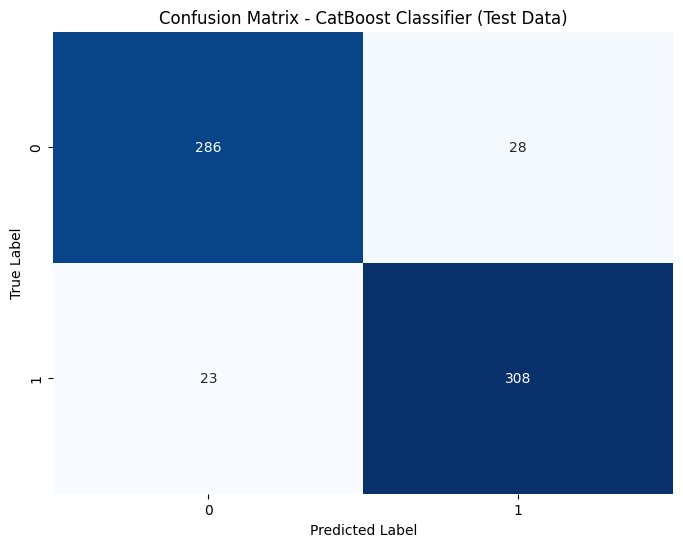

In [43]:
# Obtain the confusion matrix by contrasting CatBoost predictions with test labels.
cm_catboost_test = confusion_matrix(ytestmentalhealth, y_pred_catboost)

# Construct a new figure of the desired size.
pltx.figure(figsize=(8, 6))

# Creatte a heattmap depiction of confuson matrx that lacks a colorbar, has blue text, integer formatting, and annotations.
snsx.heatmap(cm_catboost_test, annot=True, fmt="d", cmap="Blues", cbar=False)

# Establish the plot's title.
pltx.title("Confusion Matrix - CatBoost Classifier (Test Data)")

# Put "Predicted Label" on x axis label.
pltx.xlabel("Predicted Label")

# Put "True Label" on  y axis.
pltx.ylabel("True Label")

# Display generated plott
pltx.show()

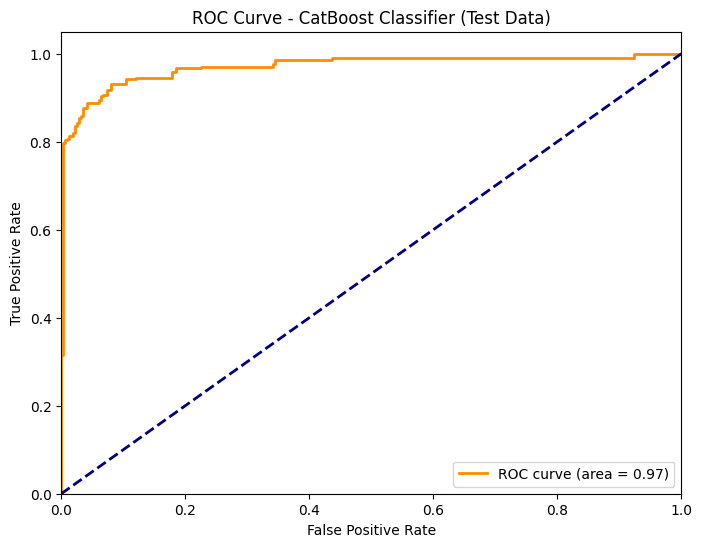

In [44]:
# Obtain the CatBoost modl's expected probabillity .
y_prob_catboost_test = catboostmodelcls.predict_proba(xtestmentalhealth)[:, 1]

# Find the ROC curve's thresholds and false positive and true positive rates.
fpr_catboost_test, tpr_catboost_test, thresholds_catboost_test = roc_curve(ytestmentalhealth, y_prob_catboost_test, pos_label='Yes')

# Compute area undder ROC crv
roc_auc_catboost_test = auc(fpr_catboost_test, tpr_catboost_test)

# Construct a new figure of the desired size.
pltx.figure(figsize=(8, 6))

# Plott the ROC crv with  AUC value labeled and the orange line.
pltx.plot(fpr_catboost_test, tpr_catboost_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_catboost_test:.2f})')

# To represent a random estimate, draw a dashed line diagonally.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Define the x-axis bounds .
pltx.xlim([0.0, 1.0])

# Establish y axis limits with a tiny buffer
pltx.ylim([0.0, 1.05])

# Put 'False Positive Rate' on  x axis label.
pltx.xlabel('False Positive Rate')

# Put 'True Positive Rate' on  y axis label.
pltx.ylabel('True Positive Rate')

# Include  modl name in the narrative title.
pltx.title('ROC Curve - CatBoost Classifier (Test Data)')

# Show the legnd in bottom rightt cornner.
pltx.legend(loc='lower right')

# Create a plott rendering
pltx.show()

# **Model 3 Voting Classifier**

In [45]:
# Set up  XGB clasifier.
xgbcls = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# To ensure fair comparison, initialize the LightGBM classifier with parameters identical to those of XGBoost.
lgbm_clf = lgb.LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Construct a soft voting ensemble by integrating the LightGBM and XGBoost models.
votingcls = VotingClassifier(estimators=[('xgb', xgbcls), ('lgbm', lgbm_clf)], voting='soft')

# The ensemble model is trained using the training data.
votingcls.fit(xtrainmentalhealth, ytrainmentalhealth)

# Use the trained ensemble to produce predictions on the test set.
y_pred_voting = votingcls.predict(xtestmentalhealth)

[LightGBM] [Info] Number of positive: 744, number of negative: 761
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4885
[LightGBM] [Info] Number of data points in the train set: 1505, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494352 -> initscore=-0.022592
[LightGBM] [Info] Start training from score -0.022592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

# **Training Result**

Voting Classifier Training Accuracy: 0.9993355481727575
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       761
         Yes       1.00      1.00      1.00       744

    accuracy                           1.00      1505
   macro avg       1.00      1.00      1.00      1505
weighted avg       1.00      1.00      1.00      1505



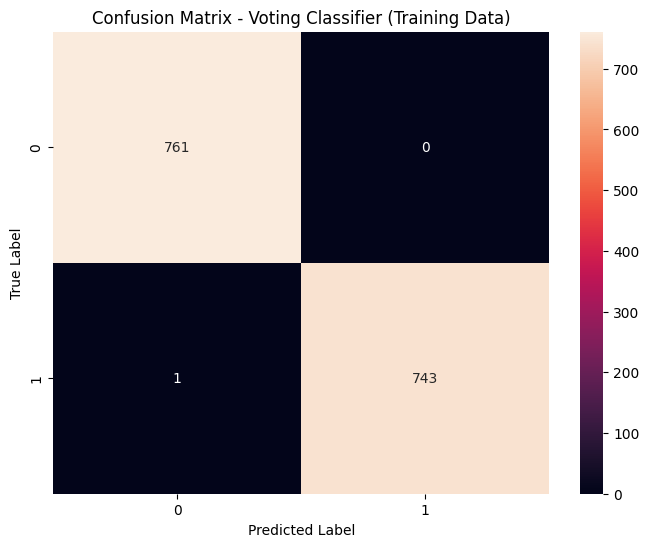

In [46]:
# Determine and print the voting classifier's training accuracy.
trainingaccuracyvoting = votingcls.score(xtrainmentalhealth, ytrainmentalhealth)
print(f"Voting Classifier Training Accuracy: {trainingaccuracyvoting}")

# Produce forecasts using the training dataset.
ytrainmentalhealth_pred_voting = votingcls.predict(xtrainmentalhealth)

# Print the training set's comprehensive categorization metrics.
print(classification_report(ytrainmentalhealth, ytrainmentalhealth_pred_voting))

# Determine the training predictions' weighted precision score.
precision_train = precision_score(ytrainmentalhealth, ytrainmentalhealth_pred_voting, average='weighted')

# Determine the weighted recall score for the trainning forecast.
recall_train = recall_score(ytrainmentalhealth, ytrainmentalhealth_pred_voting, average='weighted')

# Calculate the trainning predictions' weighted F1-score.
f1_train = f1_score(ytrainmentalhealth, ytrainmentalhealth_pred_voting, average='weighted')

# Construct a confusion matrix to help forecast trainning dataa.
cm_voting_train = confusion_matrix(ytrainmentalhealth, ytrainmentalhealth_pred_voting)

# Set up  visualization fig.
pltx.figure(figsize=(8, 6))

# Create a confuson matrx heatmap with annotations
snsx.heatmap(cm_voting_train, annot=True, fmt="d")

# Configure  confuson matrx plott tittle.
pltx.title("Confusion Matrix - Voting Classifier (Training Data)")

# Label confuson matrix's x axis
pltx.xlabel("Predicted Label")

# Label confuson matrix's y axis
pltx.ylabel("True Label")

# Show visualization of confuson matrx.
pltx.show()

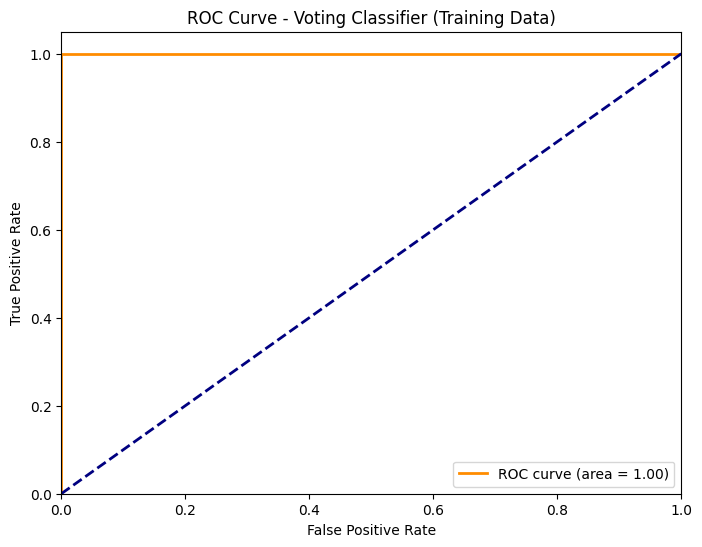

In [47]:
# Determine the VotingClassifier's expected probability for the positive class
y_prob_voting_tran = votingcls.predict_proba(xtrainmentalhealth)[:, 1]

# Use predicted probability and true labels to calculate ROC curve metrics (FPR, TPR, and thresholds).
fpr_voting_train, tpr_voting_train, thresholds_voting_train = roc_curve(ytrainmentalhealth, y_prob_voting_tran, pos_label='Yes')

# To measure classifier performance, computte  area undder ROC crv (AUC).
roc_auc_voting_train = auc(fpr_voting_train, tpr_voting_train)

# Make a new fig of the desired size.
pltx.figure(figsize=(8, 6))

# Plott ROC crv in  legend using  orange line, linewidth 2, and AUC value.
pltx.plot(fpr_voting_train, tpr_voting_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_voting_train:.2f})')

# A random estimate is represented by a diagonal dashed line.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set False Positive Rate x axis limitations .
pltx.xlim([0.0, 1.0])

# Set  y axis boundaries for the Trrue Posittive Rate between 0 and 1.05 (additional space).
pltx.ylim([0.0, 1.05])

# Put 'False Positive Rate' on x axis labl.
pltx.xlabel('False Positive Rate')

# Put 'True Posittive Rate' on  y axis labl.
pltx.ylabel('True Positive Rate')

# Set the plott tittle to show  training data and VotingClassifier.
pltx.title('ROC Curve - Voting Classifier (Training Data)')

# Put the legend in the plot's lowerr right cornr.
pltx.legend(loc='lower right')

# Present  ROC curve plott in its complete configuration.
pltx.show()

# **Testing result**

In [57]:
# Determine and print the VotingClassifier acuracy score.
accuracy_voting = accuracy_score(ytestmentalhealth, y_pred_voting)

# Produce a classification report that includes F1 scores, recall, and precision.
print(f"Voting Classifier Accuracy: {accuracy_voting}")

# Create and show each class's classification metrics.
print(classification_report(ytestmentalhealth, y_pred_voting))

Voting Classifier Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

          No       0.97      0.89      0.93       314
         Yes       0.90      0.97      0.93       331

    accuracy                           0.93       645
   macro avg       0.93      0.93      0.93       645
weighted avg       0.93      0.93      0.93       645



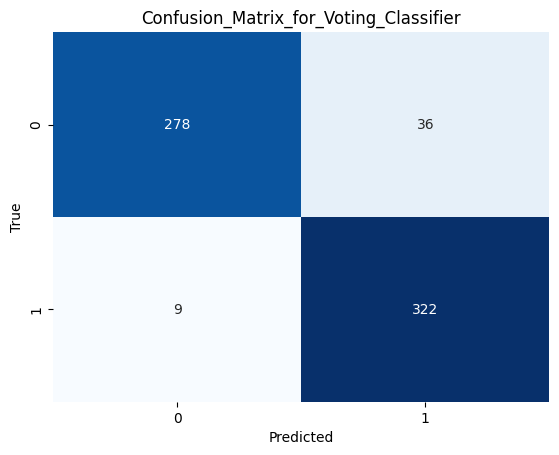

In [58]:
# To assess the model's performance, create a confuson matrx.
cm_voting = confusion_matrix(ytestmentalhealth, y_pred_voting)

# Confusion matrix heatmap shown with annotations
snsx.heatmap(cm_voting, annot=True, fmt='d', cmap="Blues", cbar=False)

# Configure the confuson matrx plot tittle.
pltx.title('Confusion_Matrix_for_Voting_Classifier')

# Mark  x-axis with  expected values.
pltx.xlabel('Predicted')

# Indicate true values on  Y axis.
pltx.ylabel('True')

# Show  matrix plot of perplexity.
pltx.show()

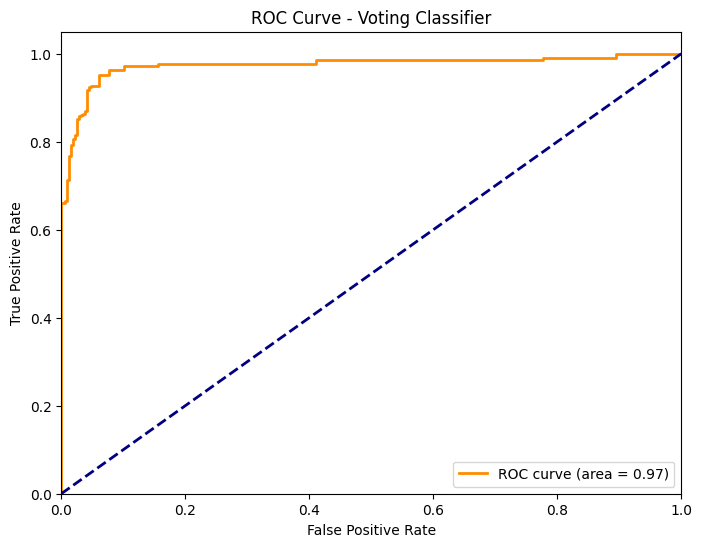

In [59]:
# Obtain the anticipated odds for the posittive clas.
y_prob_voting = votingcls.predict_proba(xtestmentalhealth)[:, 1]

# Determine the metrics for the ROC curve.
fpr_voting, tpr_voting, thresholds_voting = roc_curve(ytestmentalhealth, y_prob_voting, pos_label='Yes')

# Determine the area underr ROC crv.
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Make a ROC crv plot fig
pltx.figure(figsize=(8, 6))

# Use computed metrics to plott  ROC crv.
pltx.plot(fpr_voting, tpr_voting, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_voting:.2f})')

# Draw a diagoonal line to symbolize a randoom guess.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Establish x-axis bounds for  ROC graphic.
pltx.xlim([0.0, 1.0])

# Establish  ROC plot's Y axis limitations.
pltx.ylim([0.0, 1.05])

# On  x axis, display  falsse posittive rate.
pltx.xlabel('False Positive Rate')

# Indicate the genuine posittive rate on the Y axis.
pltx.ylabel('True Positive Rate')

# Set the ROC crv plot's tittle.
pltx.title('ROC Curve - Voting Classifier')
# Include a legend in the loweer rightt cornr of the ROC plott.
pltx.legend(loc='lower right')

# present  plott of ROC curve.
pltx.show()

# **Comparision of models graph**

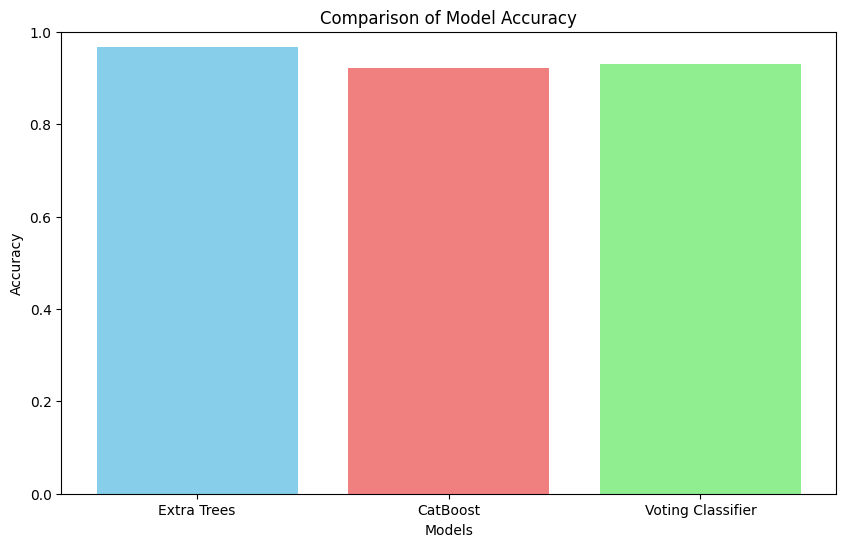

In [49]:
# Determine the ET modl's accuracy score.
extra_trees_accuracy = accuracy_score(ytestmentalhealth, ypredextratrees)
# Determine the CatBoost model's acuracy score.
catboost_accuracy = accuracy_score(ytestmentalhealth, y_pred_catboost)
# Determine the Vting Clasifier model's acuracy sccore.
voting_accuracy = accuracy_score(ytestmentalhealth, y_pred_voting)

# Compile  list oof visualization modl names.
models = ['Extra Trees', 'CatBoost', 'Voting Classifier']
# Maintain a list of acuracy ratings for every modl name.
accuracy_scores = [extra_trees_accuracy, catboost_accuracy, voting_accuracy]

# Set the plot's first figure to the requested size.
pltx.figure(figsize=(10, 6))
# Make a bar plott with designated colors to compare  model's accuracy.
pltx.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
# Put 'Models' on  x axis label.
pltx.xlabel("Models")
# Put 'Accuracy' on  y axis label.
pltx.ylabel("Accuracy")
# Assign the accuracy comparison plot a title.
pltx.title("Comparison of Model Accuracy")
# For accurate depiction, set the y-axis boundaries.
pltx.ylim(0, 1)
# Showing the plot that was created.
pltx.show()

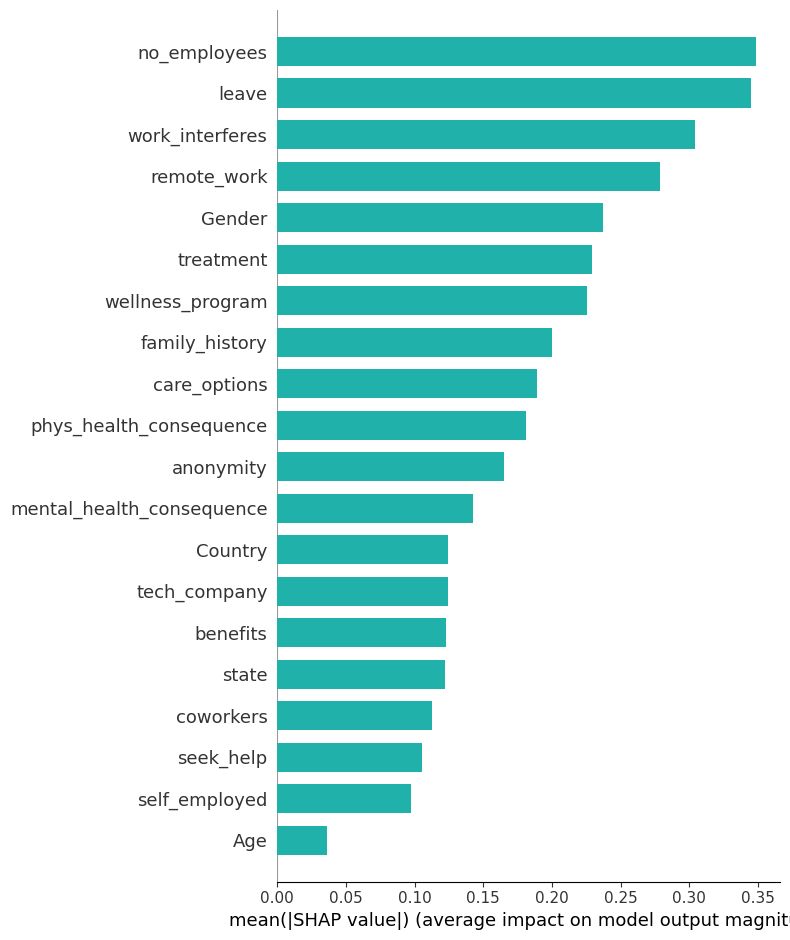

In [50]:
# Build up SHAP TreeExplainer to decipher the predictions of the CatBoost model.
explainer = shap.TreeExplainer(catboostmodelcls)

# Determine the test set's SHAP values to comprehend feature contributions.
shap_values = explainer.shap_values(xtestmentalhealth)
# Utilize SHHAP valuees to create a bar plot of feature importances with unique design.
shap.summary_plot(shap_values,xtestmentalhealth, plot_type="bar", feature_names=x.columns, color="#20B2AA")

# Show  plott from matplotlib.
pltx.show()

In [51]:
# Use training features and feature names to create a LIME explanation object for tabbular dataa.
explainer = lime.lime_tabular.LimeTabularExplainer(xtrainmentalhealth, feature_names=x.columns.tolist(), class_names=['No', 'Yes'], discretize_continuous=True)

# Chose  first example to describe from the test set.
instance_index = 0

# To provide an explanation, extract the particular test case.
instance =xtestmentalhealth[instance_index]

# Use CatBoost's probability predictions to provide a LIME explanation.
exp = explainer.explain_instance(instance, catboostmodelcls.predict_proba, num_features=10)  # You can change the number of features to display

# Put the description into a notebook and highlight the key features.
exp.show_in_notebook()

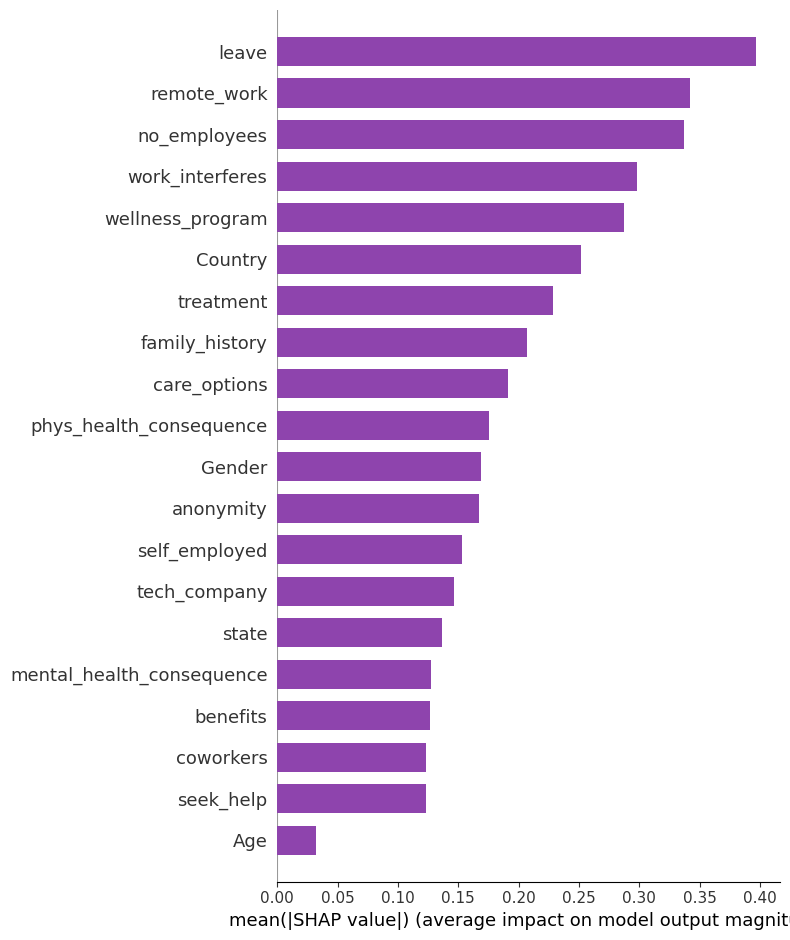

In [52]:
# Set up SHAP TreeExplainer using the VotingClassifier's first estimator (XGBoost).
explainer = shap.TreeExplainer(votingcls.estimators_[0])

# Determine the test set's SHHAP values to clarify the model's predictions.
shap_values = explainer.shap_values(xtestmentalhealth)

# To construct a bar plot of feature importances, use SHAP values and a custom purple hue.
shap.summary_plot(shap_values,xtestmentalhealth, plot_type="bar", feature_names=x.columns, color="#8e44ad")

# Show plott that was created.
pltx.show()

In [53]:
# Set up training features, feature names, class labels, and continuous feature discretization in the LIME explanation for tabular data.
explainer = lime.lime_tabular.LimeTabularExplainer(xtrainmentalhealth, feature_names=x.columns.tolist(), class_names=['No', 'Yes'], discretize_continuous=True)

# To explaain, pick the first example.
instance_index = 0

# To clarify, extract the particular test instnce.
instance =xtestmentalhealth[instance_index]

# Creatte a LIMEE explantion based on  probability predictions of the voting classifier.
exp = explainer.explain_instance(instance, votingcls.predict_proba, num_features=10)

# Visulize the explantion in notebok with feature importance breakdown
exp.show_in_notebook()